In [1]:
%matplotlib inline 
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
from matplotlib.pyplot import *
img_path = '../data/panda.jpg'

/home/ekbana/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = np.array(Image.open(img_path).convert('RGB'))
'''
Convert the image into torch.Tensor and apply pooling layer
'''

image_tensor = torch.Tensor(image)
print(f'shape of original image: {image_tensor.shape}')

image_tensor = torch.reshape(image_tensor, (3, 1080, 1920))
print(f'Reshape the original image: {image_tensor.shape}')

# max pooling object
max_pooling = nn.MaxPool2d(2,2)

"""Applying max pooling to image: image_after_pooling img_a_p"""
img_a_p = max_pooling(image_tensor)

print(f'shape of image after applying pooling: {img_a_p.shape}')

shape of original image: torch.Size([1080, 1920, 3])
Reshape the original image: torch.Size([3, 1080, 1920])
shape of image after applying pooling: torch.Size([3, 540, 960])


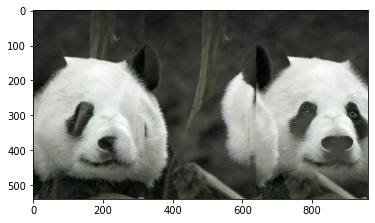

In [3]:
'''
Let's compare the original image with image after max pooling
'''
img_a_p_n = img_a_p.reshape(540, 960, 3).numpy()
PIL_image = Image.fromarray(img_a_p_n.astype('uint8'), 'RGB')
imshow(PIL_image)


In [4]:
convnet = nn.Conv2d(3, 20, 5)

In [46]:
out =  convnet(image_tensor)

In [47]:
one_out = out[0].detach()

In [49]:
one_out.expand(3, 1076, 1916).numpy().reshape()

(3, 1076, 1916)

In [60]:
for weights, value in convnet.named_parameters():
    PIL_image = Image.fromarray(value.detach().numpy().astype('uint8'), 'RGB')
    imshow(PIL_image)


ValueError: Too many dimensions: 4 > 3.

In [61]:
weights, value = next(convnet.named_parameters())


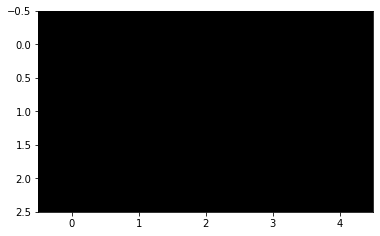

In [68]:
value[0].detach().numpy()
PIL_image = Image.fromarray(value[3].detach().numpy().astype('uint8'), 'RGB')
imshow(PIL_image)


In [69]:
value[3]

tensor([[[-0.0039,  0.0672,  0.0666,  0.0486, -0.0765],
         [ 0.0818,  0.0393,  0.1066, -0.0461, -0.0673],
         [-0.0419,  0.0946,  0.0672, -0.0880,  0.0690],
         [-0.0001,  0.0025,  0.0707,  0.0584,  0.0554],
         [-0.0577, -0.0321, -0.0363, -0.0535,  0.0641]],

        [[ 0.0595,  0.0841,  0.0905,  0.0865, -0.0778],
         [-0.0713,  0.0089,  0.0159,  0.0076, -0.0875],
         [-0.1054,  0.0196,  0.0241, -0.0812,  0.0384],
         [-0.0498, -0.0944, -0.0807, -0.0538, -0.1038],
         [ 0.0373,  0.0066,  0.0906,  0.0894, -0.0091]],

        [[-0.0388,  0.0423, -0.1094,  0.0061, -0.1103],
         [ 0.0346,  0.0623, -0.0605, -0.0220, -0.0904],
         [ 0.0194,  0.0639, -0.1024,  0.0137,  0.0912],
         [ 0.1027,  0.0093, -0.0773,  0.0687, -0.0347],
         [ 0.0917, -0.0579, -0.0698,  0.0555, -0.0221]]],
       grad_fn=<SelectBackward0>)